# EDA on our Proprietary Data

We will begin another investigation by performing EDA on our RCC data.
Below is the TOM dataset.

In [1]:
import pandas as pd 
import scanpy as sc


In [3]:
adata = sc.read_loom("RCC_data.loom")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [5]:
print(adata)

# What metadata is available per cell?
print(adata.obs.columns)

# View unique values in key columns (e.g., sample types or conditions)
print(adata.obs["summaryDescription"].value_counts())
print(adata.obs["patient"].value_counts())

# Check available gene info
print(adata.var.columns)



AnnData object with n_obs × n_vars = 14435 × 15362
    obs: 'annotation', 'broad', 'n_counts', 'patient', 'summaryDescription', 'tcr'
    var: 'ensembl_id', 'gene_name'
Index(['annotation', 'broad', 'n_counts', 'patient', 'summaryDescription',
       'tcr'],
      dtype='object')
summaryDescription
Tumour            11746
Tumour-normal      1328
Metastasis          893
Thrombus            236
Fat                 186
Normal kidney        31
Blood                 9
Normal adrenal        6
Name: count, dtype: int64
patient
PD43824    3070
PD45815    3012
PD45816    2359
PD47171    2351
PD43948    1873
PD47512     612
PD44966     453
PD45814     289
PD47465     267
PD44967     149
Name: count, dtype: int64
Index(['ensembl_id', 'gene_name'], dtype='object')


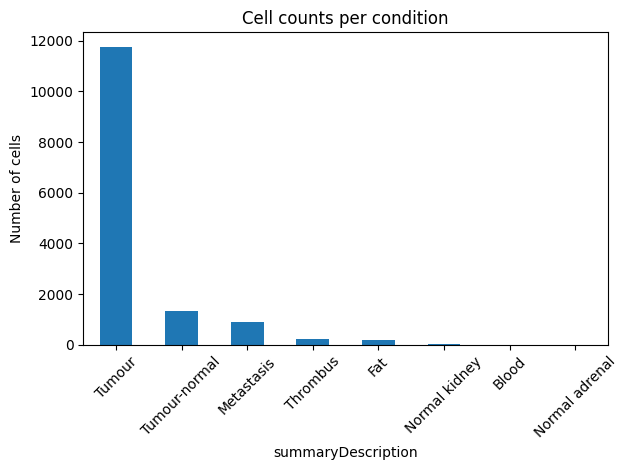

In [6]:
import matplotlib.pyplot as plt

# Bar plot: number of cells per condition
adata.obs["summaryDescription"].value_counts().plot(kind="bar")
plt.title("Cell counts per condition")
plt.ylabel("Number of cells")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


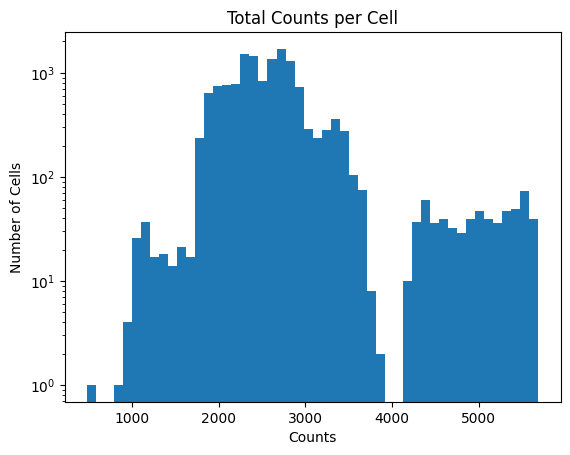

In [7]:
# Check total counts per cell
adata.obs["n_counts"] = adata.X.sum(axis=1)

# Histogram of total counts
adata.obs["n_counts"].plot(kind="hist", bins=50, log=True)
plt.title("Total Counts per Cell")
plt.xlabel("Counts")
plt.ylabel("Number of Cells")
plt.show()


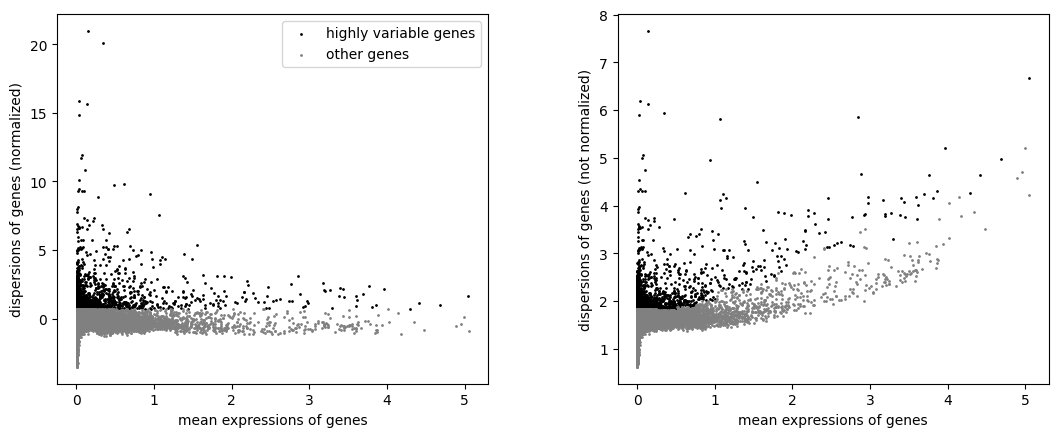

In [8]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

# Plot
sc.pl.highly_variable_genes(adata)


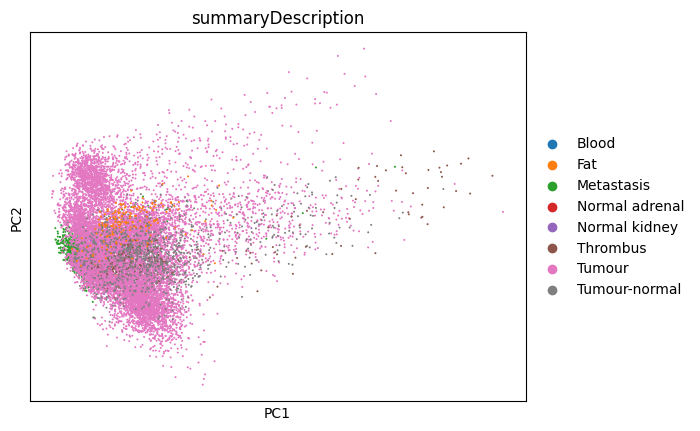

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-03-24 15:50:41.468461: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


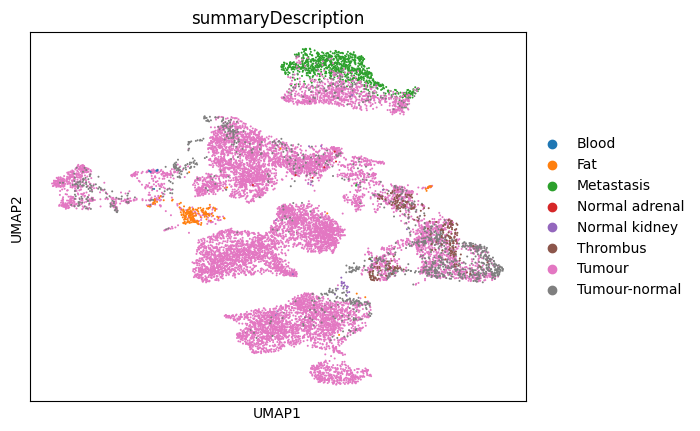

In [9]:
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='summaryDescription')

sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color='summaryDescription')
